### Islands shape and distribution control

In [177]:
import __init__
import numpy as np
from engine import Noise,Heatmap,CombineNoises,gradient
from noises import *
from utilities import *
import random
from matplotlib import pyplot as plt
import matplotlib
RESOLUTION = 500
SEED = random.randint(0,100000)
print(SEED)

32478


In [178]:
def norm(matrix):
    matrix -= np.min(matrix)
    matrix /= np.max(matrix)
    return matrix

In [179]:
def cut(matrix, threshold = 0):
	matrix[matrix <= threshold] = 0
	return matrix

def worley_land_mass(points=2, cutoff=0, radius=1, seed=1234):
	return norm(cut(-worley(resolution=RESOLUTION, points=points, n=1, seed=seed) + 1, cutoff) ** radius)

Noise(worley_land_mass, 
	points=(2, 100),
	cutoff=(0.0, 1.0, 0.05),
	radius=(0.0, 5.0, 0.05),
	seed=(0, 1000),
	cmap='gray_r', cbar=True,vmin=-1)

interactive(children=(IntSlider(value=51, description='points', min=2), FloatSlider(value=0.5, description='cu…

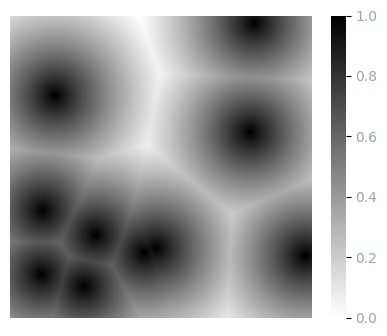

In [180]:
random.seed(SEED)


def islands_boundares(points, temperature):
    assert points > 0
    boundary = np.zeros(shape=(RESOLUTION, RESOLUTION))
    for i in range(points):
        x = random.randrange(int(RESOLUTION * 0.1), int(RESOLUTION * 0.9))
        y = random.randrange(int(RESOLUTION * 0.1), int(RESOLUTION * 0.9))
        print("X={} Y={}".format(x,y))
        Heatmap(heat(RESOLUTION, temperature, x, y), cmap="gray_r", cbar=True)
        boundary += heat(RESOLUTION, temperature, x, y)
    return norm(boundary)


#isLandBoundares = islands_boundares(2, 17)  # <17,19>
isLandBoundares = worley_land_mass(10,0.5,2.5,SEED)
Heatmap(isLandBoundares, cmap="gray_r", cbar=True)
#Heatmap(isLandBoundares**1.5, cmap="gray_r", cbar=True)


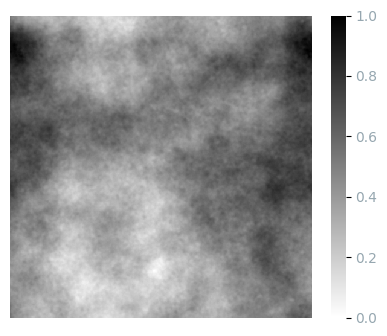

In [181]:
terainNoises = CombineNoises(
    [1.0,0.4,0.1],
    [
        simplex(RESOLUTION,8,2,0.35,seed = SEED),
        simplex(500,8,2,0.5,seed=SEED+100),
        simplex(500,8,2,0.7,seed=SEED+200),
    ]
)
terainNoises = norm(terainNoises)
Heatmap(terainNoises,cbar=True,cmap='gray_r')

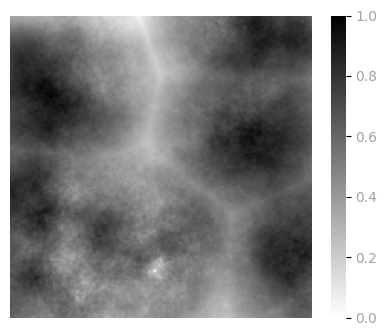

In [182]:
terainHightMap = (terainNoises * np.abs(isLandBoundares))**0.5

terainHightMap = norm(terainHightMap)

Heatmap(terainHightMap,cbar=True,cmap='gray_r')

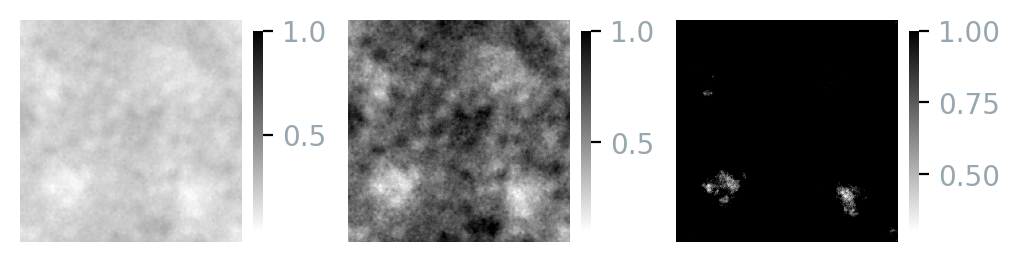

In [183]:
terainMoisture = simplex(resolution=RESOLUTION,octaves=5,persistence=2,lacunarity=0.27,seed=SEED+300)
terainMoisture = norm(terainMoisture) + 0.1

Heatmap(terainMoisture/3,terainMoisture,terainMoisture*3,scale = 2.0,cmap="gray_r",cbar=True,vmax=1.0)

Levels: 18 | depth: 10


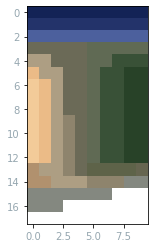

In [184]:
#Add bioms

WATER_DARK = np.array([19,35,86])
WATER_MEDIUM = np.array([35,51,106])
WATER_BRIGHT = np.array([76,96,157])

NATURE_DRY = np.array([107,106,87])
NATURE_SMALL = np.array([96,106,84])
NATURE_NORMAL = np.array([57,81,55])
NATURE_BIG = np.array([40,66,40])


STONES_NATURE_LITTLE = np.array([142,132,109])
STONES_NATURE = np.array([94,99,73])
STONES_NATURE_BIG = np.array([102,101,80])

STONES = np.array([173,158,131])
STONES_DESERT = np.array([177,145,110])

DESERT_LITTLE = np.array([173,158,131])
DESERT_MIDDLE = np.array([235,187,135])
DESSERT = np.array([243,203,153])

SNOW_LOW =  np.array([132,136,128])
SNOW =  np.array([255,255,255])


#Y height, step 5 (16 elems)
#X moisture, step 10 (10 elems)
mapBioms = [
    [WATER_DARK for _ in range(10)],
    [WATER_MEDIUM for _ in range(10)],
    [WATER_BRIGHT for _ in range(10)],
    [NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_SMALL,NATURE_SMALL,NATURE_SMALL,NATURE_SMALL],
    [DESERT_LITTLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_NORMAL],
    [DESERT_MIDDLE,DESERT_LITTLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [STONES_DESERT,STONES,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,STONES_NATURE,STONES_NATURE,STONES_NATURE,STONES_NATURE,STONES_NATURE_BIG],
    [STONES_DESERT,STONES_DESERT,STONES,STONES,STONES,STONES_NATURE_LITTLE,STONES_NATURE_LITTLE,STONES_NATURE_LITTLE,SNOW_LOW,SNOW_LOW],
    [SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW,SNOW,SNOW],
    [SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW],
    [SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW],
]

mapBiomsLevels = len(mapBioms)
mapBiomsDepth = len(mapBioms[0])

print("Levels: {} | depth: {}".format(mapBiomsLevels,mapBiomsDepth))

colorsLegend = np.zeros(shape=(mapBiomsLevels,mapBiomsDepth,3),dtype=np.ubyte)
for y in range(mapBiomsLevels):
    for x in range(mapBiomsDepth):
        colorsLegend[y][x] = mapBioms[y][x]
plt.imshow(colorsLegend)

17


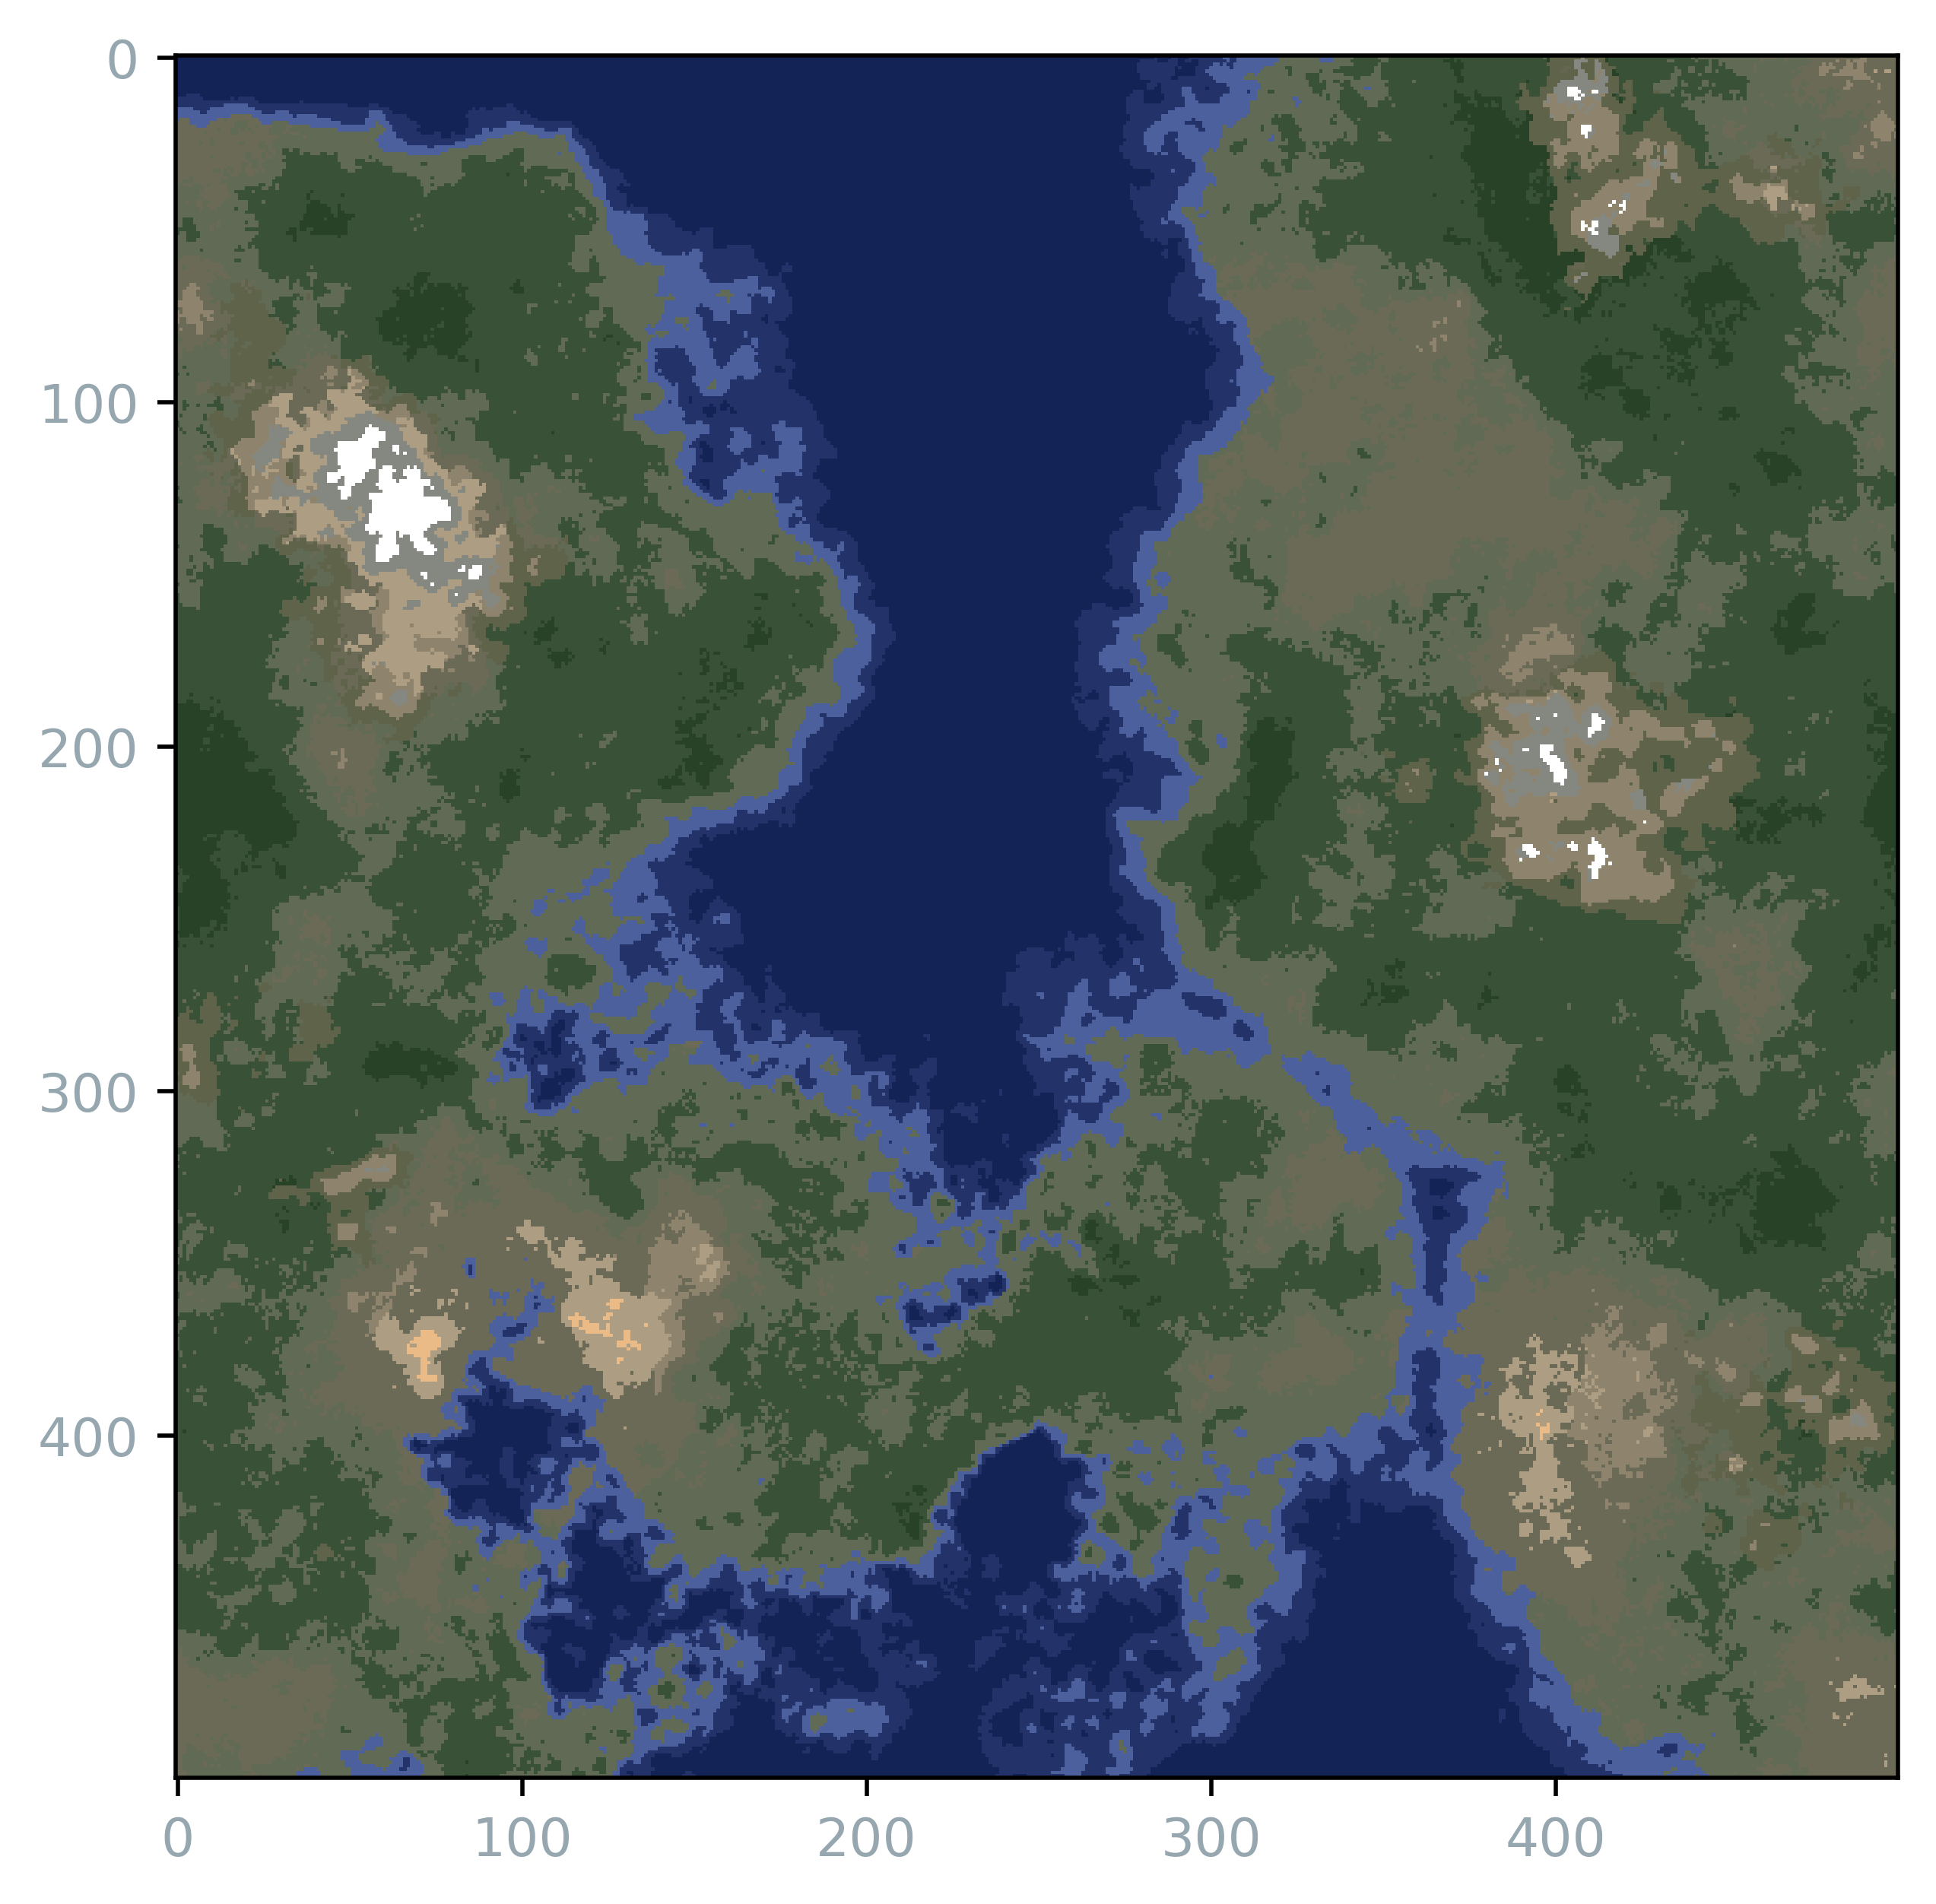

In [187]:
heightMin = 0.4
heightMax = 1.0
heightStep = (heightMax - heightMin)/mapBiomsLevels
#heightMax = np.max(terainHightMap)

moistureMin = 0
moistureMax = 1
moisureStep = (moistureMax - moistureMin)/mapBiomsDepth

map = np.zeros(shape=(RESOLUTION,RESOLUTION,3),dtype=np.ubyte)
for y in range(RESOLUTION):
    for x in range(RESOLUTION):
        height = max(terainHightMap[y][x],heightMin)
        moisture = max(terainMoisture[y][x],moistureMin)

        level = int((height - heightMin)/heightStep)
        if level >= mapBiomsLevels:
            level = mapBiomsLevels -1
        depth =  int((moisture - moistureMin)/moisureStep)
        if depth >= mapBiomsDepth:
            depth = mapBiomsDepth-1
        map[y][x] = mapBioms[level][depth]
        
fig = plt.figure(figsize=(6,6),dpi=500)
plt.imshow(map)